### Introduction to Data Mining 
### Paragon International University 
### Instructor: Rina Buoy



##### sources:

https://thecleverprogrammer.com/2020/11/16/apriori-algorithm-using-python/

https://docs.microsoft.com/en-us/archive/msdn-magazine/2014/january/test-run-frequent-item-sets-for-association-rule-learning

https://www.kaggle.com/ashishpatel26/association-rule-mining-for-lastfm-using-python/notebook

### Theories

Identifying frequent item-sets can be useful in many ways. In the case of a supermarket, knowledge of which items are often purchased together could be used for product placement, targeted marketing, and so on. Additionally, once all frequent items sets have been identified, these item-sets could be analyzed further to extract rules such as, “if customers purchase both apples and bread, then there’s high probability they will also purchase lettuce and milk.” This overall process of first extracting frequent item-sets and then harvesting if-then rules is called association rule learning.



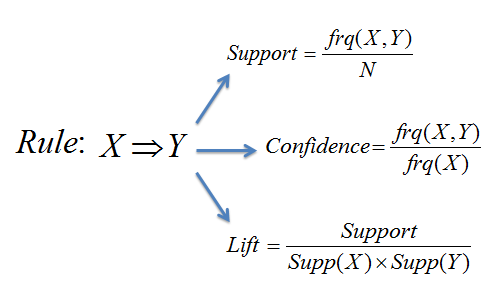

### Steps 

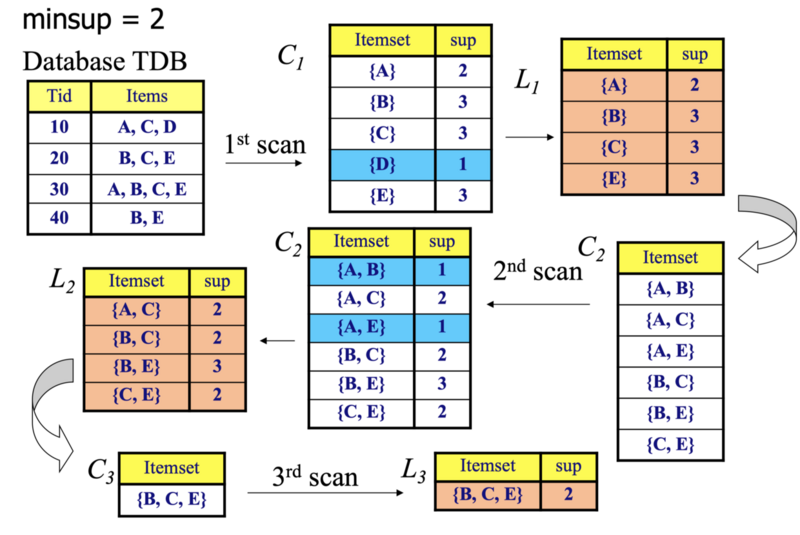https://imgs.developpaper.com/imgs/158566895-ae3e33380c542b03_articlex.png

### Libraries & Dataset

In [1]:
# Library installtion for apriori
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=46d2b3bad4296779bf4adb42c7eb1def00c2f2a7cf64b403b5919fe52bb055be
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing
import plotly.express as px
import apyori
from apyori import apriori

In [3]:
!wget https://www.biz.uiowa.edu/faculty/jledolter/DataMining/lastfm.csv

--2022-01-14 10:10:51--  https://www.biz.uiowa.edu/faculty/jledolter/DataMining/lastfm.csv
Resolving www.biz.uiowa.edu (www.biz.uiowa.edu)... 128.255.103.85
Connecting to www.biz.uiowa.edu (www.biz.uiowa.edu)|128.255.103.85|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8699995 (8.3M) [text/csv]
Saving to: ‘lastfm.csv’

lastfm.csv          100%[===================>]   8.30M  45.8MB/s    in 0.2s    

2022-01-14 10:10:51 (45.8 MB/s) - ‘lastfm.csv’ saved [8699995/8699995]



In [4]:
data = pd.read_csv("lastfm.csv")
data.head()

,user,artist,sex,country
0,1,red hot chili peppers,f,Germany
1,1,the black dahlia murder,f,Germany
2,1,goldfrapp,f,Germany
3,1,dropkick murphys,f,Germany
4,1,le tigre,f,Germany


### Top Products

In [5]:
print("Top 10 frequently artist")
x = data['artist'].value_counts().sort_values(ascending=False)[:10]
fig = px.bar(x= x.index, y= x.values)
fig.update_layout(title_text= "Top 10 frequently artist (Graphical Representation)", xaxis_title= "Products", yaxis_title="Count")
fig.show()

Top 10 frequently artist


### Some Processing Steps 

Each row in the dataset represents a product purphased by a unique user for a given day. Therefore, we need to perform some aggregration steps by combining items (rows) purphased by the same user on the same day into a single transaction. 

In [6]:
data= data[['user','artist']]
data= data.drop_duplicates()
data.shape

(289953, 2)

In [7]:
records = []
for i in data['user'].unique():
    records.append(list(data[data['user'] == i]['artist'].values))

In [8]:
for i in range(10):
    print(records[i])

['red hot chili peppers', 'the black dahlia murder', 'goldfrapp', 'dropkick murphys', 'le tigre', 'schandmaul', 'edguy', 'jack johnson', 'eluveitie', 'the killers', 'judas priest', 'rob zombie', 'john mayer', 'the who', 'guano apes', 'the rolling stones']
['devendra banhart', 'boards of canada', 'cocorosie', 'aphex twin', 'animal collective', 'atmosphere', 'joanna newsom', 'air', 'portishead', 'massive attack', 'broken social scene', 'arcade fire', 'plaid', 'prefuse 73', 'm83', 'the flashbulb', 'pavement', 'goldfrapp', 'amon tobin', 'sage francis', 'four tet', 'max richter', 'autechre', 'radiohead', 'neutral milk hotel', 'beastie boys', 'aesop rock', 'mf doom', 'the books']
['tv on the radio', 'tool', 'kyuss', 'dj shadow', 'air', 'a tribe called quest', 'the cinematic orchestra', 'beck', 'bon iver', 'röyksopp', 'bonobo', 'the decemberists', 'snow patrol', 'battles', 'the prodigy', 'pink floyd', 'rjd2', 'the flaming lips', 'michael jackson', 'mgmt', 'the rolling stones', 'late of the pi

### Apriori Algrithm

In [ ]:
## TODO: 
## Apply Apriori algorithm to generate rules using the following parameters:
## min_support = 0.01
## min_confidence = 0.5
## min_lift = 5
## max_length = 3
## target = "rules"

## store the results in a variable 'rules'
rules = apriori.

### Print out some rules 

In [ ]:
association_results = list(rules)

In [ ]:
for item in association_results:
    
    pair = item[0]
    items = [x for x in pair]
    
    print("Rule : ", items[0], " -> " + items[1])
    print("Support : ", str(item[1]))
    print("Confidence : ",str(item[2][0][2]))
    print("Lift : ", str(item[2][0][3]))
    print("=============================") 

### Question: if a user listens to 'kanye west', which artist would you recommend to him/her ? Explain why ?